# Code

In [1]:
# Code for india as reporter and partner
india = 699 
# Trade regime
# [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, 
# {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
# Partner Laos
year = 2019
partner = 418
cc = 'AG4' # AG2, AG4, AG6

# Initialisation

In [2]:
import os
import sys
sys.path.append("../../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)

from comtrade.analysis import Analysis
tta = Analysis()

## Data availability request

In [3]:
source = 699 # India
destination = 418 # Lao
tta.set_source_destination(source, destination)

status = tta.api.data_available(india, 201912, 'HS', 'M')
print(status)
status = tta.api.data_available(partner, 201912, 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


## Data request

In [4]:
data_in, data_out = tta.get_import_data(year, cc) 
data = tta.compare(data_in, data_out)

{'r': 699, 'p': 418, 'rg': 1, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': 418, 'p': 699, 'rg': 2, 'ps': 2019, 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


## Data

In [5]:
df = pd.DataFrame.from_dict(data, orient='index')
df['value_diff'] = df['value_a'] - df['value_b']
df['quantity_diff'] = df['quantity_a'] - df['quantity_b']
df['quantity_diff'].round(2)
df['value_diff'].round(2)
df['quantity_pct'] = (df['quantity_diff'] / df['quantity_a']) * 100
df['value_pct'] = (df['value_diff'] / df['value_a']) * 100
df['quantity_pct'].round(2)
df['value_pct'].round(2)
df['value_diff_abs'] = abs(df['value_diff'])
df['value_pct_abs'] = abs(df['value_pct'])
df

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
0901,0901,"Coffee, whether or not roasted or decaffeinate...",155851,Weight in kilograms,0.20,162000,Weight in kilograms,0.19,0.01,-6149,-3.945435e+00,5.000000,0.01,5.000000
1211,1211,Plants and parts of plants (including seeds an...,14000,Weight in kilograms,0.01,0,Weight in kilograms,0.00,0.01,14000,1.000000e+02,100.000000,0.01,100.000000
1301,1301,"Lac; natural gums, resins, gum-resins and oleo...",45000,Weight in kilograms,0.10,92150,Weight in kilograms,0.12,-0.02,-47150,-1.047778e+02,-20.000000,0.02,20.000000
2917,2917,"Acids; polycarboxylic acids, their anhydrides,...",40000,Weight in kilograms,0.04,0,Weight in kilograms,0.00,0.04,40000,1.000000e+02,100.000000,0.04,100.000000
3002,3002,"Human blood; animal blood for therapeutic, pro...",163,Weight in kilograms,0.04,0,Weight in kilograms,0.00,0.04,163,1.000000e+02,100.000000,0.04,100.000000
3307,3307,"Perfumery, cosmetic or toilet preparations; pr...",1000,Weight in kilograms,0.00,14719,Weight in kilograms,0.00,0.00,-13719,-1.371900e+03,NaN,0.00,NaN
4016,4016,Articles of vulcanised rubber other than hard ...,1,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,1,1.000000e+02,NaN,0.00,NaN
4408,4408,Sheets for veneering (including those obtained...,1081440,Weight in kilograms,0.73,855789,Weight in kilograms,0.12,0.61,225651,2.086579e+01,83.561644,0.61,83.561644
4412,4412,"Plywood, veneered panels and similar laminated...",71912,Weight in kilograms,0.09,0,Weight in kilograms,0.00,0.09,71912,1.000000e+02,100.000000,0.09,100.000000
4418,4418,"Builders' joinery and carpentry of wood, inclu...",88000,Weight in kilograms,0.10,233038,Weight in kilograms,0.05,0.05,-145038,-1.648159e+02,50.000000,0.05,50.000000


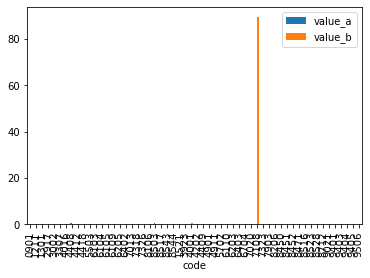

In [6]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [7]:
df.to_csv('export_in2jp_2019_2.csv')

## Aggregate

In [8]:
# value_a is source country
# value_b is destination country
print("Total Export, as per Source data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per Destination data:", df['value_b'].sum(), " million USD.")

Total Export, as per Source data: 2.5900000000000003  million USD.
Total Import, as per Destination data: 90.58999999999999  million USD.


## Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [9]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
7108,7108,Gold (including gold plated with platinum) unw...,0,Weight in kilograms,0.0,18076,Weight in kilograms,89.35,-89.35,-18076,-inf,-inf,89.35,inf


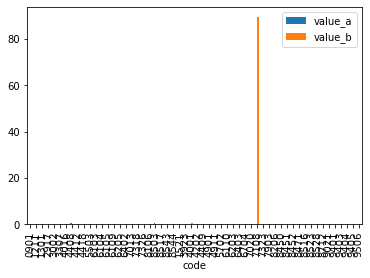

In [10]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()